In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# Importing Data

In [4]:
housing_df = pd.read_csv("/kaggle/input/housing-datafile/housing.csv")

In [5]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Plot a Histogram for the dataframe**

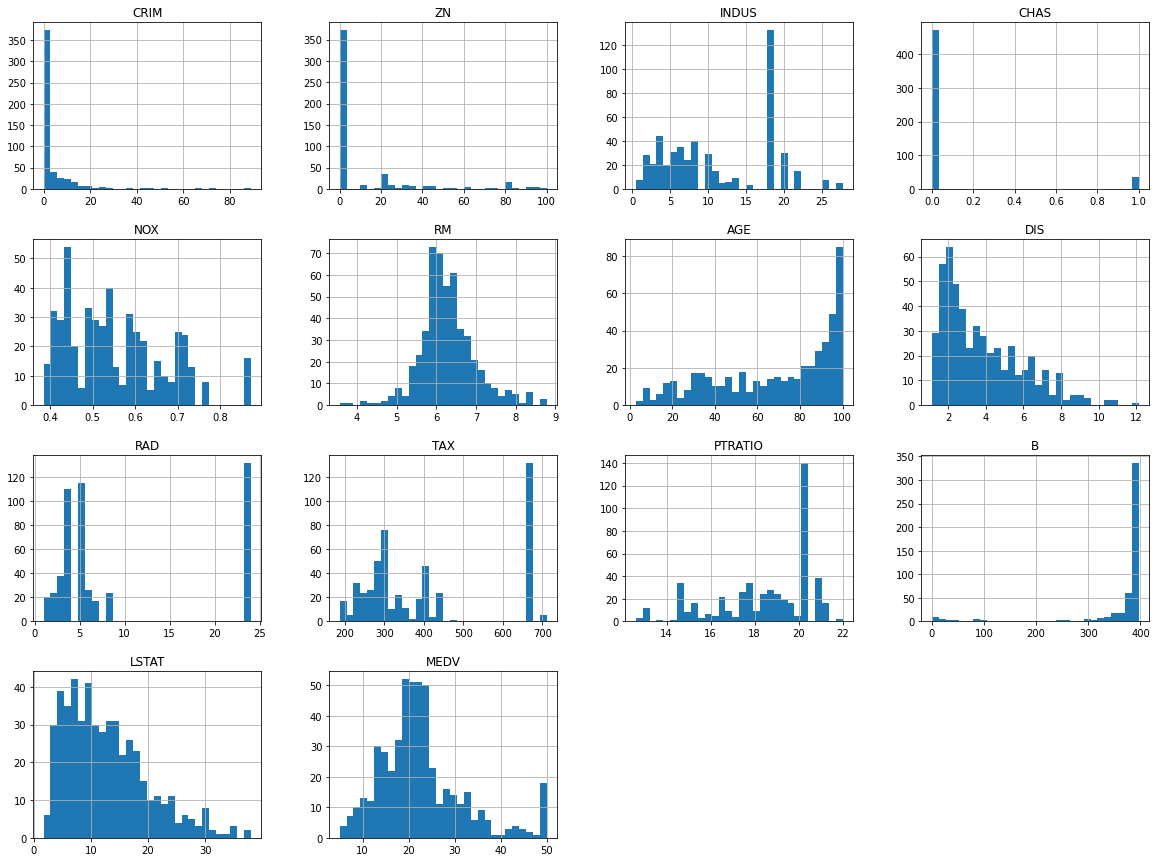

In [8]:

housing_df.hist(bins=30, figsize=(20,15))
plt.show()

# Create Test and Train Data

In [580]:
# # We will write our own split function for our knowledge
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data)* test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [581]:
#train_set, test_set = split_train_test(housing_df,0.2)

In [582]:
# print("Rows in the train set: ", len(train_set))
# print("Rows in the test set: ",len(test_set))

Rows in the train set:  405
Rows in the test set:  101


In [9]:
# use of inbuilt function train_test_split from sklearn to split
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)

In [10]:
print("Rows in the train set: ", len(train_set))
print("Rows in the test set: ",len(test_set))

Rows in the train set:  404
Rows in the test set:  102


**Making sure CHAS values are equaly distributed in test and train DF**

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices, test_indices in split.split(housing_df, housing_df['CHAS']):
    strat_train_set = housing_df.loc[train_indices]
    strat_test_set = housing_df.loc[test_indices]


In [12]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [13]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

**Check it the Stratified has divided CHAS values equally in both the splits**

In [590]:
int(378/28) == int(95/7) # this is how the stratified split works. splits the given col splits equally in test and train sets.

True

**Looking for Correlation between features and the label(MEDV)**

In [16]:
corr_matrix = strat_train_set.corr()

In [17]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

**Conclusion:**
1. MEDV col has highest positive correlation with RM col and LSTAT col has the highest negative correlation. 

In [18]:
fig = px.imshow(corr_matrix, color_continuous_scale='RdBu_r', origin='lower')
fig.show()

In [19]:
#Scatter Matrix of the dataframe
fig = px.scatter_matrix(strat_train_set,
                        dimensions=['MEDV', 'RM', 'ZN','INDUS','PTRATIO','LSTAT'],
                       height=1000,
                       width = 1000)
fig.show()

In [20]:
fig = px.scatter(strat_train_set, x="RM", y="MEDV")
fig.show()

**Conclusion based on above scatter plot of RM vs MEDV:**
1. There are outliers seen in the plot. 
2. There may be a capping of MEDV 50, as the RM increses the correlation can be seen that the MEDV increases but it gets set at 50. 
3. We can remove the outliers from the data for more accuracy. 
4. We can also try attributes combination to train a much better model.

**Trying Attribute Combinations (learning purpose)**

In [21]:
strat_train_set['TAXRM'] = strat_train_set['TAX']/strat_train_set['RM']

In [22]:
strat_train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [23]:
corr_matrix = strat_train_set.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [24]:
fig = px.scatter(strat_train_set, x="TAXRM", y="MEDV")
fig.show()

**Handle Missing Attributes (learning purpose):**
There are 3 ways to do this:
1. Remove the row wherein null value for the attribute is present
2. Remove the whole col i.e. attribute wherein the null value is present
3. Replace the null value with some value(0, min, median)

In [25]:
#option 1, drop the row
a = housing_df.dropna(subset=["RM"])

In [26]:
#option 2, drop the col
a = housing_df.drop("RM", axis=1)

In [27]:
# option 3, Replace the null value with some value
median = housing_df["RM"].median()
print(median)
housing_df.fillna(median)

6.2085


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [28]:
# we can also use the sklearn inbuilt funstion SimpleImputer to replace  
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing_df)

SimpleImputer(strategy='median')

In [29]:
X = imputer.transform(housing_df)

In [30]:
housing_tr = pd.DataFrame(X, columns=housing_df.columns)

In [31]:
housing_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**NOTE: In our Data set there is no null values, so we do not have to the above step**

Feature Scaling:
1. Min-Max Scaling (Normalisation): (value - min)/(max - min)
    sklearn has a function: MinMaxScaler
2. Standardization: (value - mean)/std
    sklearn has a function: StandardScaler

# Creating Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

In [34]:
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median" )),
    ("std_scaler", StandardScaler())
])

In [35]:
housing = strat_train_set.drop("MEDV", axis=1)
housing = housing.drop("TAXRM",axis=1) # drop the TAXRM, we had added it for traing purose
housing_labels = strat_train_set["MEDV"].copy()

In [36]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [37]:
housing_num_tr.shape

(404, 13)

# Select a Model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()

In [39]:
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [40]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [41]:
prepared_data = my_pipeline.transform(some_data)

In [43]:
model.predict(prepared_data)

array([22.335, 25.453, 16.157, 23.285, 23.343])

In [44]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the Model

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
predictions = model.predict(housing_num_tr)

In [47]:
mse = mean_squared_error(housing_labels, predictions)
rmse = np.sqrt(mse)
rmse

1.1664120346830553

In [48]:
mse

1.3605170346534652

# Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
score = cross_val_score(model,housing_num_tr ,housing_labels, scoring="neg_mean_squared_error", cv=10)

In [51]:
rmse_score = np.sqrt(-score)
rmse_score

array([2.72136452, 2.89020686, 4.53764404, 2.53826401, 3.18738595,
       2.57900402, 4.70926287, 3.37515692, 3.17150876, 3.2175658 ])

In [52]:
def print_scores(scores):
    print("Scores: ")
    print(scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [53]:
print_scores(rmse_score)

Scores: 
[2.72136452 2.89020686 4.53764404 2.53826401 3.18738595 2.57900402
 4.70926287 3.37515692 3.17150876 3.2175658 ]
Mean:  3.292736374430864
Standard Deviation:  0.718451060055591


# Dump(save) a model in joblib

In [54]:
from joblib import dump, load

In [55]:
dump(model, "house_model.joblib")

['house_model.joblib']

# Model Testing on test data

In [56]:
X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

In [57]:
X_Prepared = my_pipeline.transform(X_test)

In [58]:
final_predictions = model.predict(X_Prepared)
print(list(y_test) )
print(final_predictions)

[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.2, 11.9, 11.7, 21.6, 19.7, 23.0, 16.7, 21.7, 20.6, 23.3, 19.6, 28.0, 5.0, 24.4, 20.8, 24.8, 21.8, 23.6, 19.0, 25.0, 20.3, 21.5]
[24.882 11.09  25.681 21.775 18.229 14.908 20.136 14.796 31.6   40.779
 19.894 11.886 25.27  25.477 19.582 11.281 31.313 14.252 23.535 18.548
 20.187 17.246 17.362 22.091 18.383 31.291 16.165 33.074  8.974 33.104
 23.312 21.237 23.108 10.636 20.806 11.574 42.41  24.169 23.24  42.77
 24.073 29.903 20.569 20.701 18.366 34.076 44.763 20.317 20.121 21.384
 21.061 14.24  21.304 15.179 25.558 3

In [59]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.984169631933958

# Using the Model

In [60]:
final_model = load("/kaggle/working/house_model.joblib")

In [61]:
feature = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])

In [62]:
final_model.predict(feature)

array([22.335])

**Conclusion:**
The Problem Statement: Predict the House Price on given features.
The Process:
*    EDA : understand the data 
*    Feature Creation 
*    Data Cleaning
*    Data Scaling
*    Create Pipeline
*    Train Model
*    Test Model(Evaluation):
1.         MSE
2.         RMSE
3.         Cross-Validation 
*    Dump the model
*    Use the model to do predictions
*    Deployment
        

**If You Like My Work, Please Upvote.  
Thank You**